In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import limpieza
import outliers
import analisis_bi_multi
import var_selection
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from scipy.stats import uniform, randint
from optbinning import OptimalBinning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_path_train = r'D:\3pi\PdModel.csv'

df = pd.read_csv(file_path_train)

In [3]:
df

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,0
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,1
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,0
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,0
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,2,0,0,1,0,0,0,...,31,0,0,1,1,1,1,0,0,0
996,997,0,30,2,0,1,0,0,0,0,...,40,0,0,1,1,3,1,1,0,0
997,998,3,12,2,0,0,0,1,0,0,...,38,0,0,1,1,2,1,0,0,0
998,999,0,45,2,0,0,0,1,0,0,...,23,0,0,0,1,2,1,1,0,1


Eliminaremos la variable OBS

In [4]:
df= df.drop(columns='OBS#')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

Hay que ajustar el tipo de dato que presentan las variables, ya que contamos con variables categoricas y se muestran como int64.

In [6]:
def type(df,column,type):
    df[column]= df[column].astype(type)
    return

In [7]:
type(df,'CHK_ACCT','object')
type(df,'HISTORY','object')
type(df,'SAV_ACCT','object')
type(df,'EMPLOYMENT','object')
type(df,'CHK_ACCT','object')
type(df,'PRESENT_RESIDENT','object')
type(df,'JOB','object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHK_ACCT          1000 non-null   object
 1   DURATION          1000 non-null   int64 
 2   HISTORY           1000 non-null   object
 3   NEW_CAR           1000 non-null   int64 
 4   USED_CAR          1000 non-null   int64 
 5   FURNITURE         1000 non-null   int64 
 6   RADIO/TV          1000 non-null   int64 
 7   EDUCATION         1000 non-null   int64 
 8   RETRAINING        1000 non-null   int64 
 9   AMOUNT            1000 non-null   int64 
 10  SAV_ACCT          1000 non-null   object
 11  EMPLOYMENT        1000 non-null   object
 12  INSTALL_RATE      1000 non-null   int64 
 13  MALE_DIV          1000 non-null   int64 
 14  MALE_SINGLE       1000 non-null   int64 
 15  MALE_MAR_or_WID   1000 non-null   int64 
 16  CO-APPLICANT      1000 non-null   int64 
 17  GUARANTOR      

In [9]:
limpieza.nan(df)

CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
DEFAULT             0
dtype: int64

No hay valores faltantes ni nulos.

array([[<Axes: title={'center': 'DURATION'}>,
        <Axes: title={'center': 'NEW_CAR'}>,
        <Axes: title={'center': 'USED_CAR'}>,
        <Axes: title={'center': 'FURNITURE'}>,
        <Axes: title={'center': 'RADIO/TV'}>],
       [<Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'RETRAINING'}>,
        <Axes: title={'center': 'AMOUNT'}>,
        <Axes: title={'center': 'INSTALL_RATE'}>,
        <Axes: title={'center': 'MALE_DIV'}>],
       [<Axes: title={'center': 'MALE_SINGLE'}>,
        <Axes: title={'center': 'MALE_MAR_or_WID'}>,
        <Axes: title={'center': 'CO-APPLICANT'}>,
        <Axes: title={'center': 'GUARANTOR'}>,
        <Axes: title={'center': 'REAL_ESTATE'}>],
       [<Axes: title={'center': 'PROP_UNKN_NONE'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'OTHER_INSTALL'}>,
        <Axes: title={'center': 'RENT'}>,
        <Axes: title={'center': 'OWN_RES'}>],
       [<Axes: title={'center': 'NUM_CREDITS'}>,
   

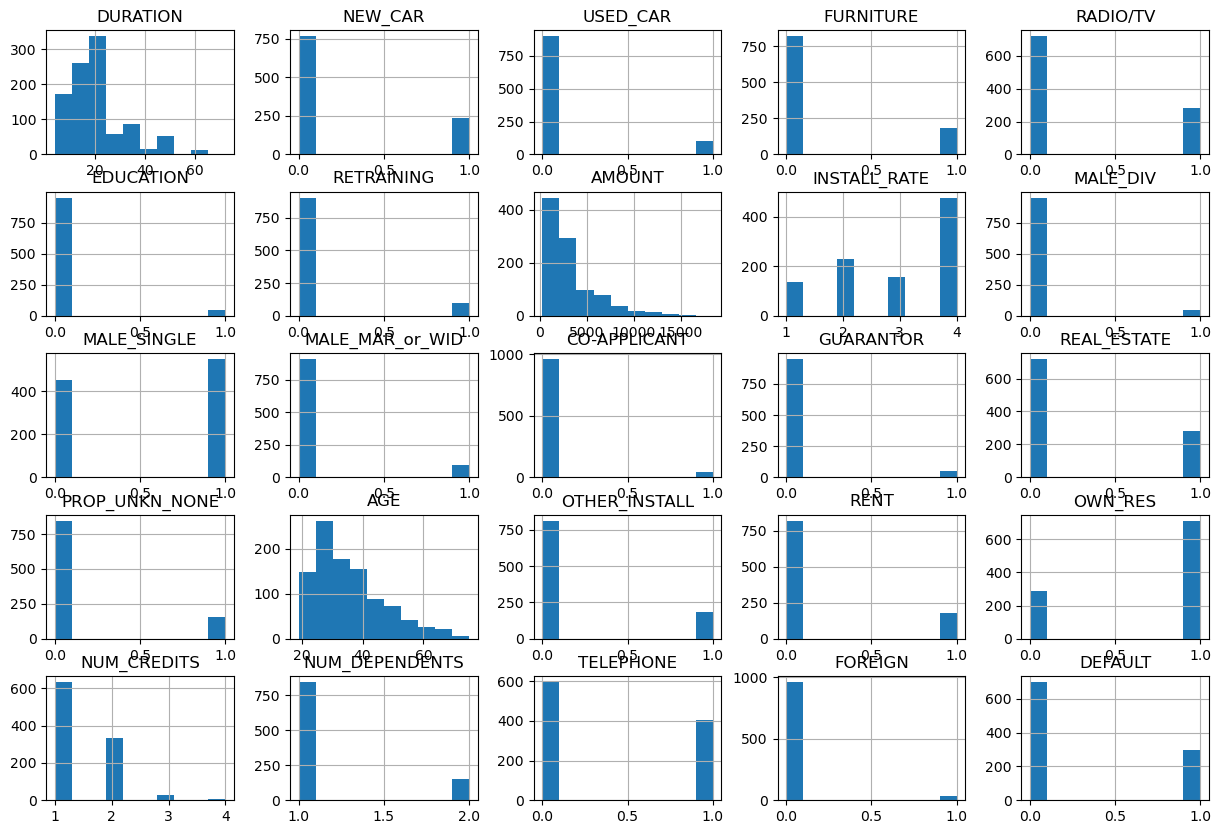

In [10]:
df.hist(figsize=(15,10))

<Axes: >

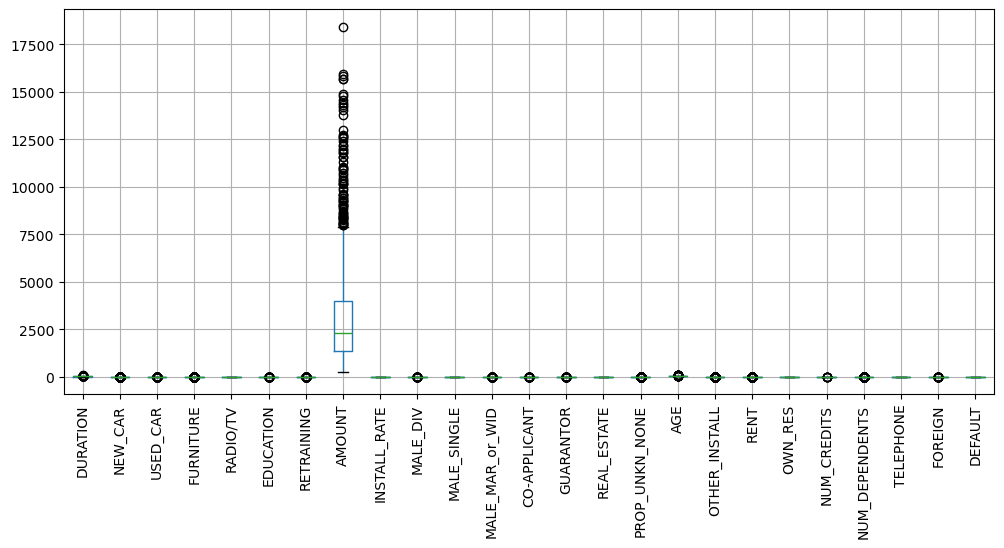

In [11]:
df.boxplot(figsize=(12,5),rot=90)

In [12]:
df['CHK_ACCT'].value_counts(), df['HISTORY'].value_counts(), df['SAV_ACCT'].value_counts(), df['EMPLOYMENT'].value_counts(), df['PRESENT_RESIDENT'].value_counts(), df['JOB'].value_counts(), df['DEFAULT'].value_counts()

(CHK_ACCT
 3    394
 0    274
 1    269
 2     63
 Name: count, dtype: int64,
 HISTORY
 2    530
 4    293
 3     88
 1     49
 0     40
 Name: count, dtype: int64,
 SAV_ACCT
 0    603
 4    183
 1    103
 2     63
 3     48
 Name: count, dtype: int64,
 EMPLOYMENT
 2    339
 4    253
 3    174
 1    172
 0     62
 Name: count, dtype: int64,
 PRESENT_RESIDENT
 4    413
 2    308
 3    149
 1    130
 Name: count, dtype: int64,
 JOB
 2    630
 1    200
 3    148
 0     22
 Name: count, dtype: int64,
 DEFAULT
 0    700
 1    300
 Name: count, dtype: int64)

In [13]:
df.describe()

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,2.973000,0.050000,...,0.154000,35.546000,0.186000,0.179000,0.713000,1.407000,1.155000,0.404000,0.037000,0.300000
std,12.058814,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,1.118715,0.218054,...,0.361129,11.375469,0.389301,0.383544,0.452588,0.577654,0.362086,0.490943,0.188856,0.458487
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,2.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,3.000000,0.000000,...,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,4.000000,0.000000,...,0.000000,42.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,4.000000,1.000000,...,1.000000,75.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000


In [14]:
df.describe(include='object')

,CHK_ACCT,HISTORY,SAV_ACCT,EMPLOYMENT,PRESENT_RESIDENT,JOB
count,1000,1000,1000,1000,1000,1000
unique,4,5,5,5,4,4
top,3,2,0,2,4,2
freq,394,530,603,339,413,630


In [15]:
def graf(df,column):
    column= df[column]
    plot = sns.JointGrid(data=df, x=column)
    plot.plot_joint(sns.histplot)
    plot.plot_marginals(sns.boxplot)
    return plot

(<seaborn.axisgrid.JointGrid at 0x2737d792a10>,
 <seaborn.axisgrid.JointGrid at 0x2737d92c610>)

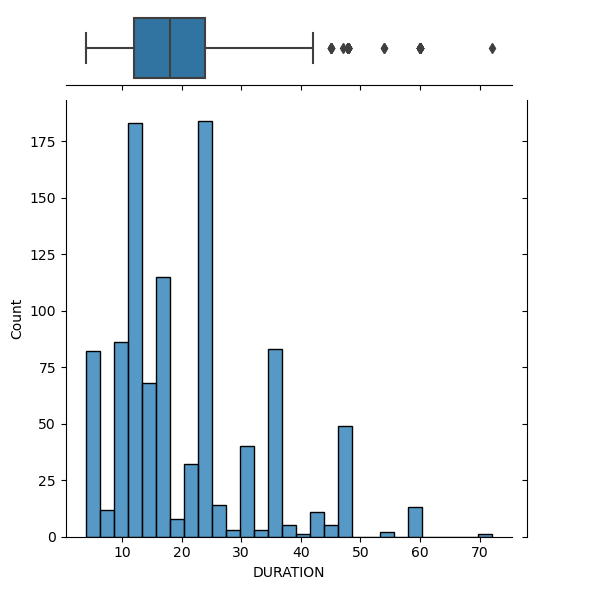

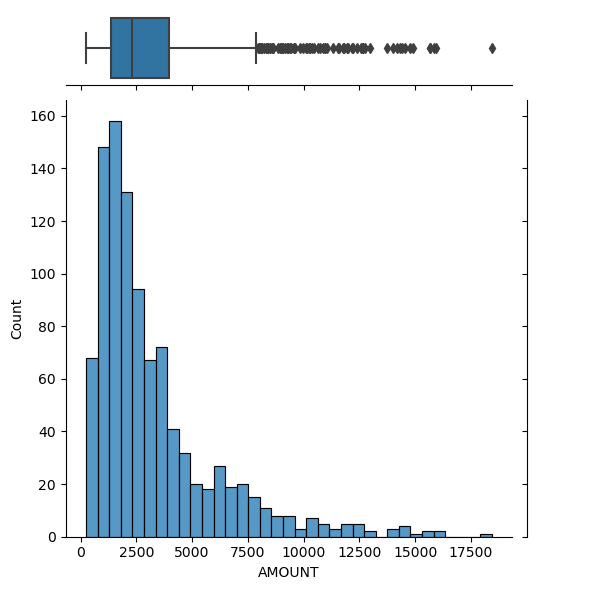

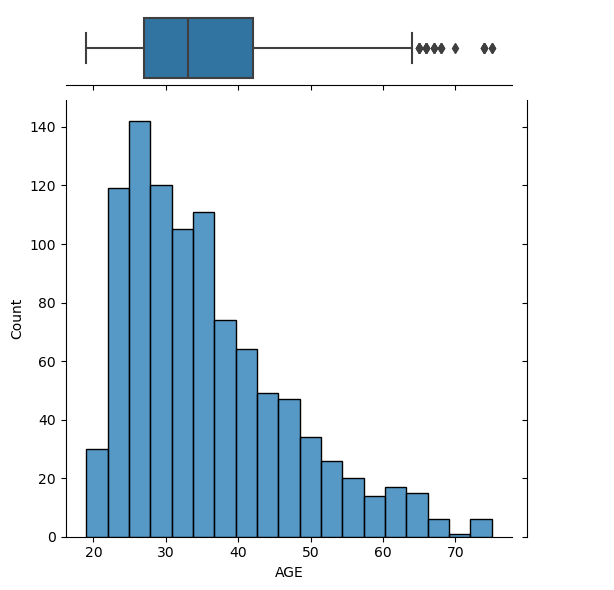

In [16]:
graf(df,'DURATION'), graf(df,'AMOUNT'), graf(df,'AGE') 

Por lo que logramos observar, las variables numericas presentan outliers, posteriormente ejecutaremos 3 pruebas para detectar outliers:
* 1) Rango intercuantil con un umbral a 3.5
* 2) Isolation Forest
* 3) KNN

In [17]:
df_iso= outliers.isolation(df,0.01,['AGE','AMOUNT','DURATION'])
df_iso

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
986,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
987,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
988,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


(<seaborn.axisgrid.JointGrid at 0x2737e997590>,
 <seaborn.axisgrid.JointGrid at 0x2737ef16610>)

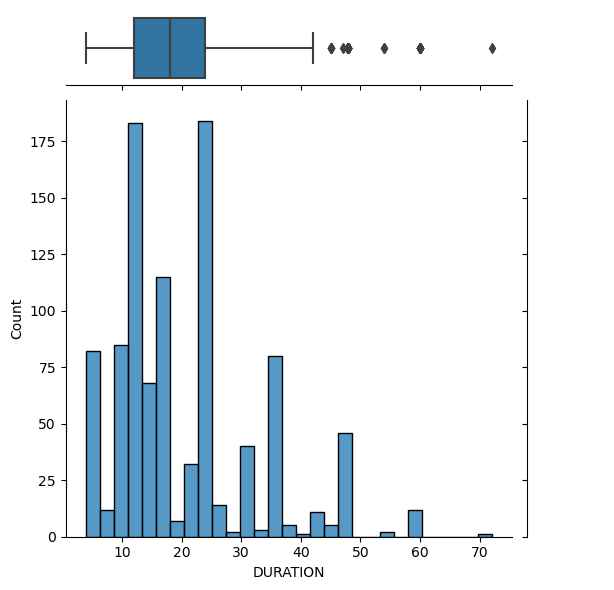

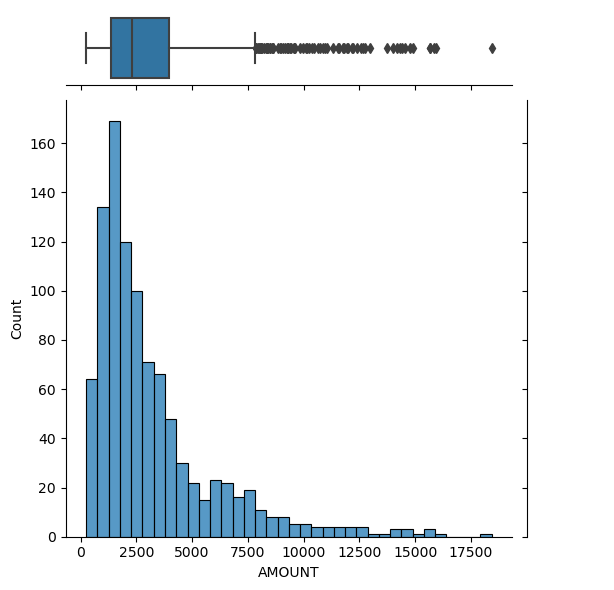

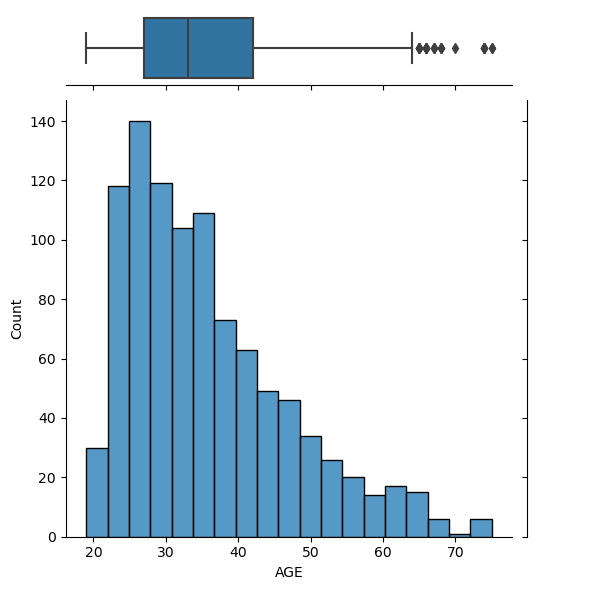

In [18]:
graf(df_iso,'DURATION'), graf(df_iso,'AMOUNT'), graf(df_iso,'AGE') 

In [19]:
df_knn= outliers.knn_outliers(df,0.01,['AGE','AMOUNT','DURATION'])
df_knn

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
989,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
990,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
991,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


(<seaborn.axisgrid.JointGrid at 0x2737f65f5d0>,
 <seaborn.axisgrid.JointGrid at 0x2737d74f8d0>)

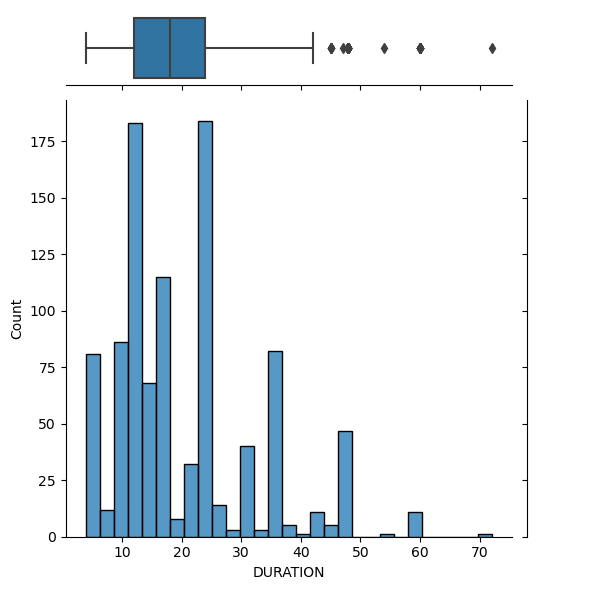

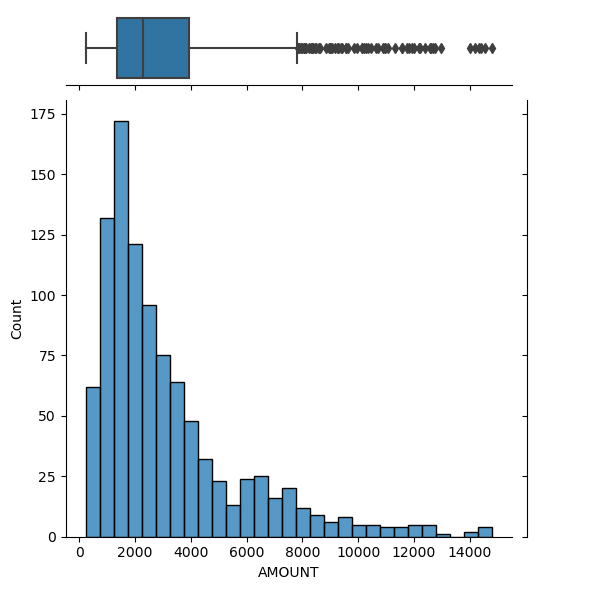

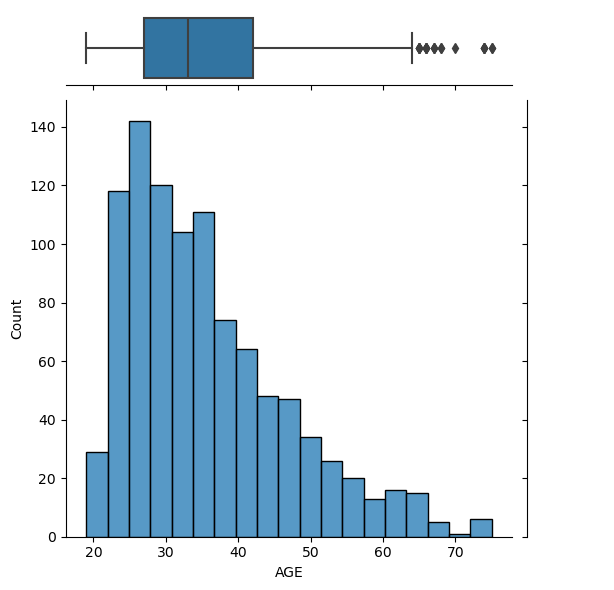

In [20]:
graf(df_knn,'DURATION'), graf(df_knn,'AMOUNT'), graf(df_knn,'AGE') 

In [21]:
outliers.quantileoutlier(df, 'AMOUNT', 3.5), outliers.quantileoutlier(df, 'AGE', 3.5), outliers.quantileoutlier(df, 'DURATION', 3.5)

(63     14421
 95     15945
 236    14555
 373    13756
 374    14782
 378    14318
 637    15653
 714    14027
 744    14179
 818    15857
 887    15672
 915    18424
 917    14896
 Name: AMOUNT, dtype: int64,
 Series([], Name: AGE, dtype: int64),
 677    72
 Name: DURATION, dtype: int64)

In [22]:
outliers.quantileoutlier(df, 'AMOUNT', 3.5).min()

13756

In [23]:
df1= df[(df['AMOUNT']<=13756) & (df['DURATION']<70)].reset_index(drop=True)
df1

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
983,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
984,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
985,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


(<seaborn.axisgrid.JointGrid at 0x27321a69a90>,
 <seaborn.axisgrid.JointGrid at 0x27321fa4310>)

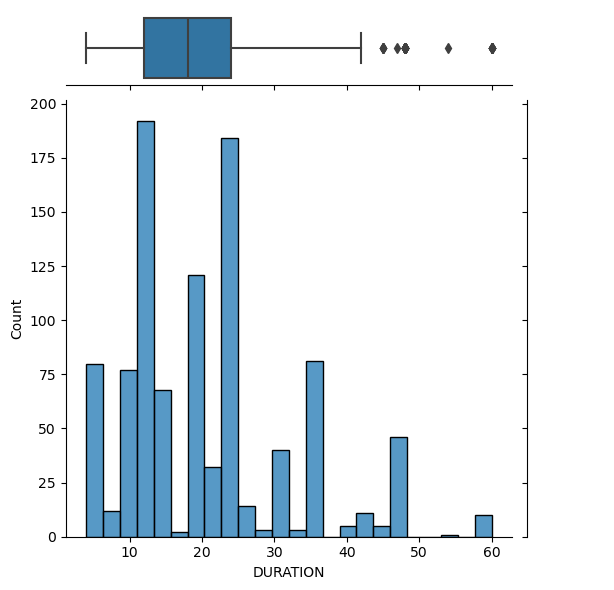

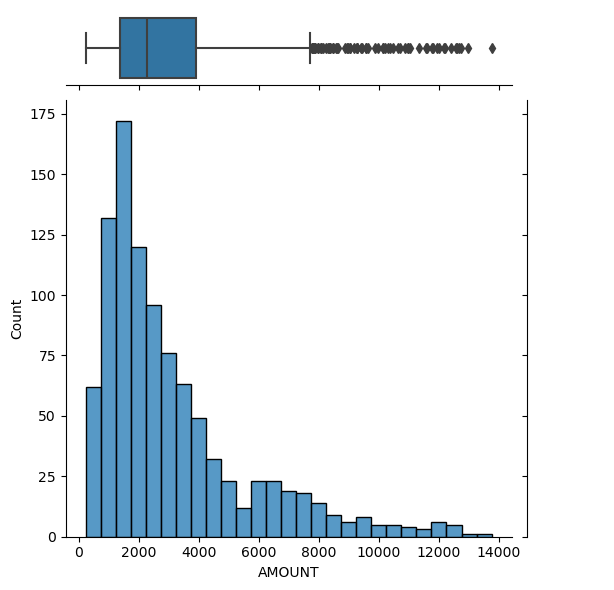

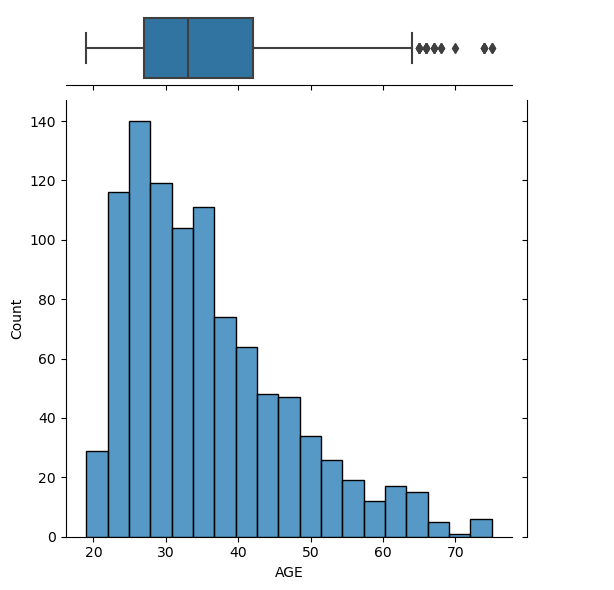

In [24]:
graf(df1,'DURATION'), graf(df1,'AMOUNT'), graf(df1,'AGE') 

Dado los graficos, hemos decidido continuar con en df1.

(<Axes: xlabel='DEFAULT', ylabel='count'>,
 DEFAULT
 0    697
 1    290
 Name: count, dtype: int64)

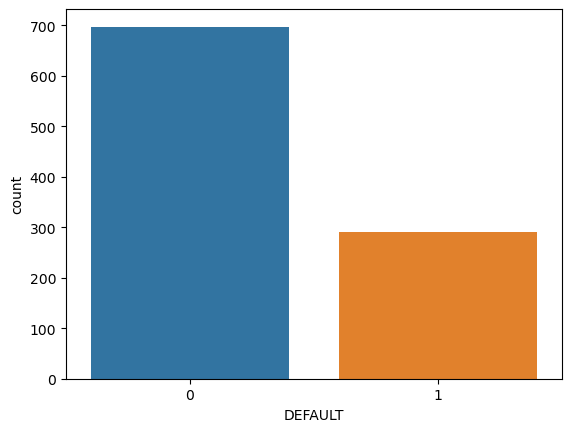

In [25]:
sns.countplot(x=df1['DEFAULT']), df1['DEFAULT'].value_counts()

<Axes: xlabel='HISTORY', ylabel='DEFAULT'>

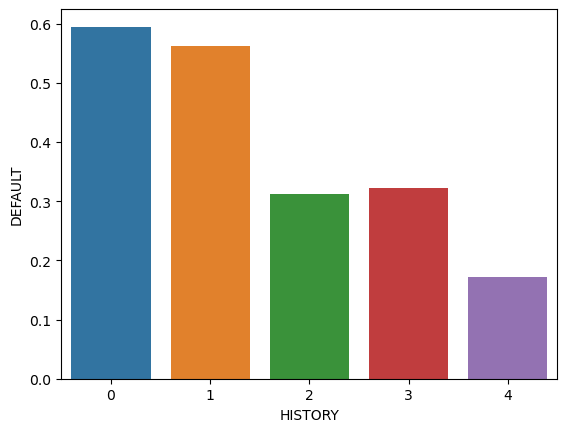

In [26]:
sns.barplot(x="HISTORY", y="DEFAULT", data=df1, ci=None)

<Axes: xlabel='CHK_ACCT', ylabel='DEFAULT'>

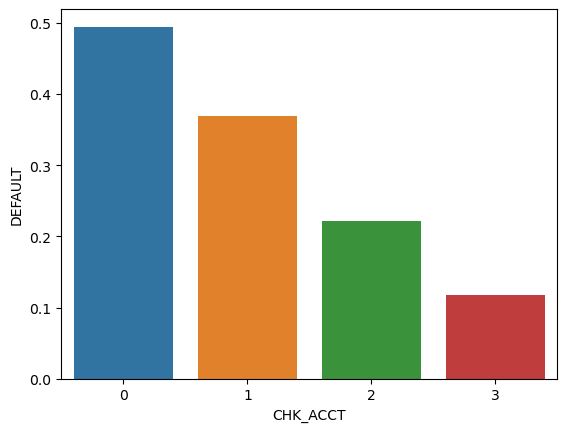

In [27]:
sns.barplot(x="CHK_ACCT", y="DEFAULT", data=df1, ci=None)

<Axes: xlabel='NEW_CAR', ylabel='DEFAULT'>

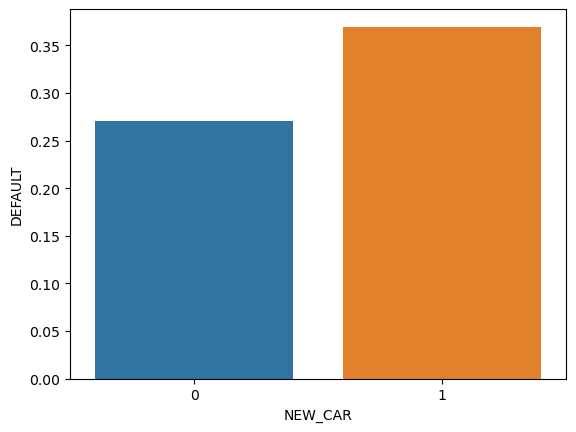

In [28]:
sns.barplot(x="NEW_CAR", y="DEFAULT", data=df1, ci=None)

<Axes: xlabel='USED_CAR', ylabel='DEFAULT'>

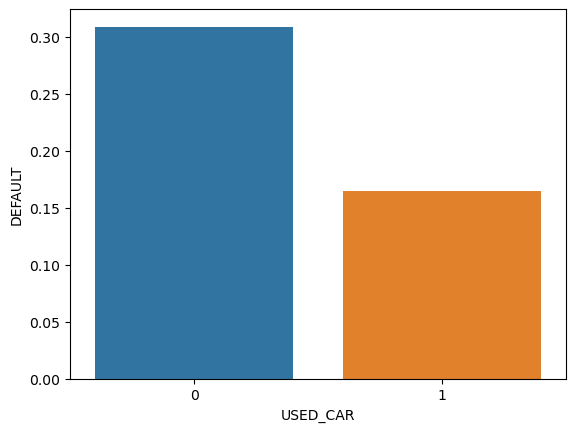

In [29]:
sns.barplot(x="USED_CAR", y="DEFAULT", data=df1, ci=None)

<Axes: xlabel='FURNITURE', ylabel='DEFAULT'>

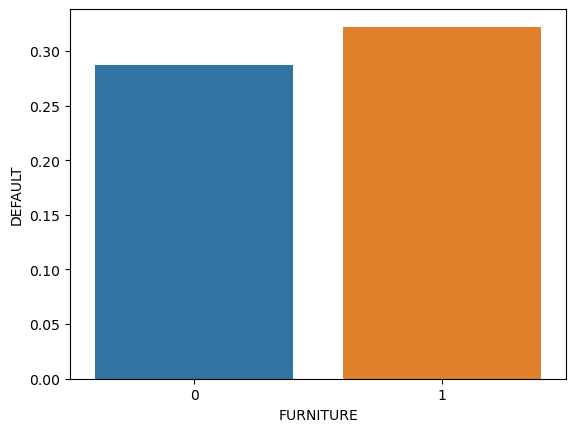

In [30]:
sns.barplot(x="FURNITURE", y="DEFAULT", data=df1, ci=None)

<Axes: xlabel='EDUCATION', ylabel='DURATION'>

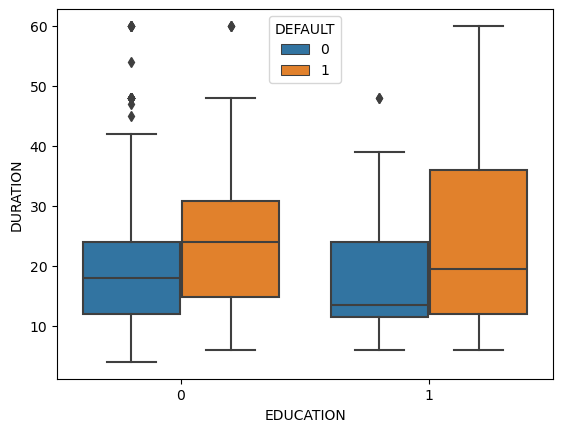

In [31]:
sns.boxplot(x="EDUCATION", y="DURATION", hue='DEFAULT', data=df1)

<Axes: xlabel='DURATION', ylabel='AMOUNT'>

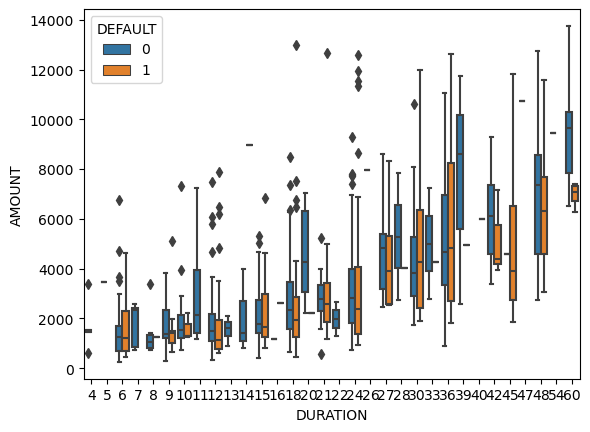

In [32]:
sns.boxplot(x="DURATION", y="AMOUNT", hue='DEFAULT', data=df1)

<Axes: xlabel='AGE', ylabel='AMOUNT'>

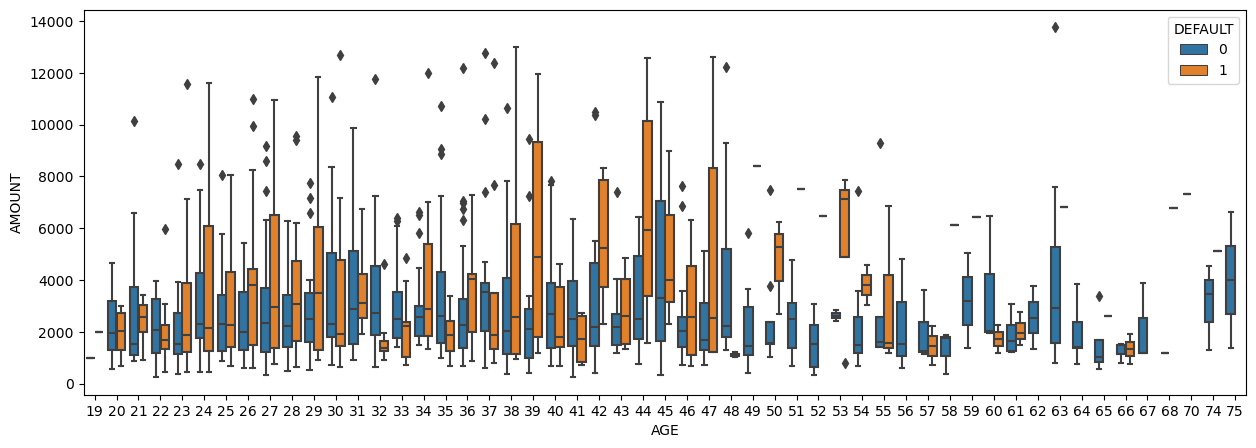

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x="AGE", y="AMOUNT", hue='DEFAULT', data=df1)

<Axes: xlabel='AGE', ylabel='DURATION'>

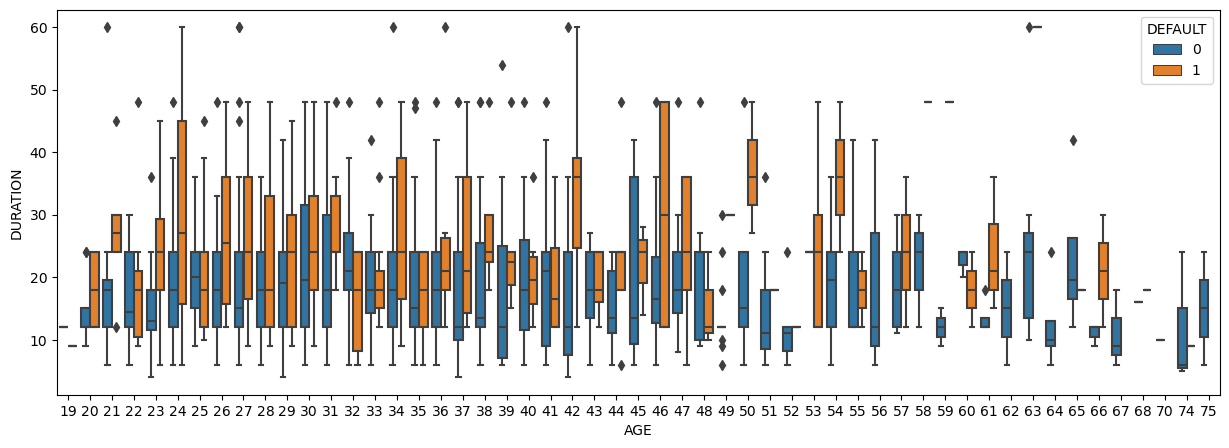

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x="AGE", y="DURATION", hue='DEFAULT', data=df1)

##### Se realizó un cross validation para saber el comportamiento del dataset #####

In [35]:
logistic= LogisticRegression(random_state=0)

In [36]:
logistic.fit(df1.drop(columns=['DEFAULT']),df1['DEFAULT'])

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [37]:
scores = cross_val_score(logistic,df1.drop(columns=['DEFAULT']),df1['DEFAULT'], cv=5)
scores

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([0.76262626, 0.75252525, 0.79187817, 0.74111675, 0.76142132])

Dividimos los datos para hacer la selección de variables

[<Axes: ylabel='CHK_ACCT'>,
 <Axes: ylabel='HISTORY'>,
 <Axes: ylabel='SAV_ACCT'>,
 <Axes: ylabel='EMPLOYMENT'>,
 <Axes: ylabel='PRESENT_RESIDENT'>,
 <Axes: ylabel='JOB'>]

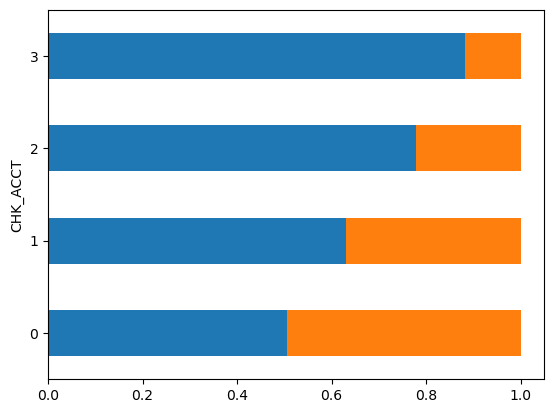

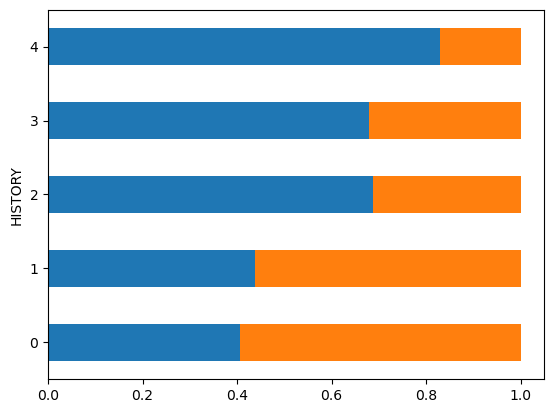

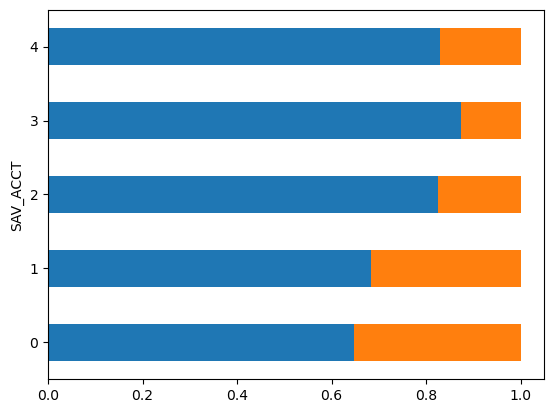

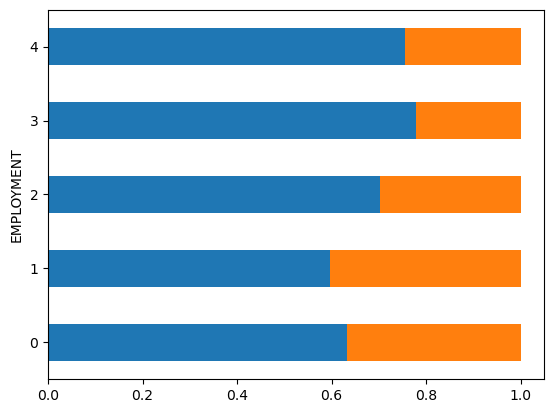

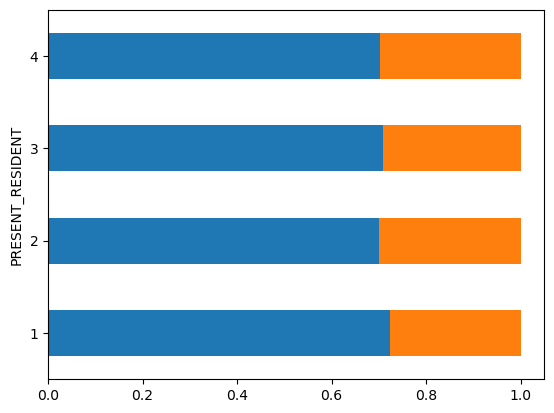

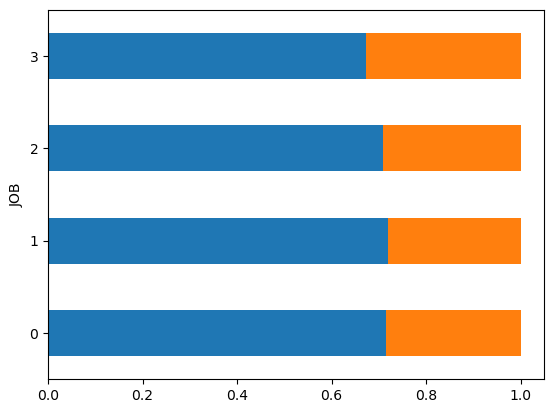

In [38]:
analisis_bi_multi.contingency(df1,df1['DEFAULT'])

Analizando los graficos de contingencia, podemos observar como se distribuye la probabilidad en base a la distribucion.
* CHK_ACCT: A mayor 
* HISTORY: A mayor historial, 

<Axes: >

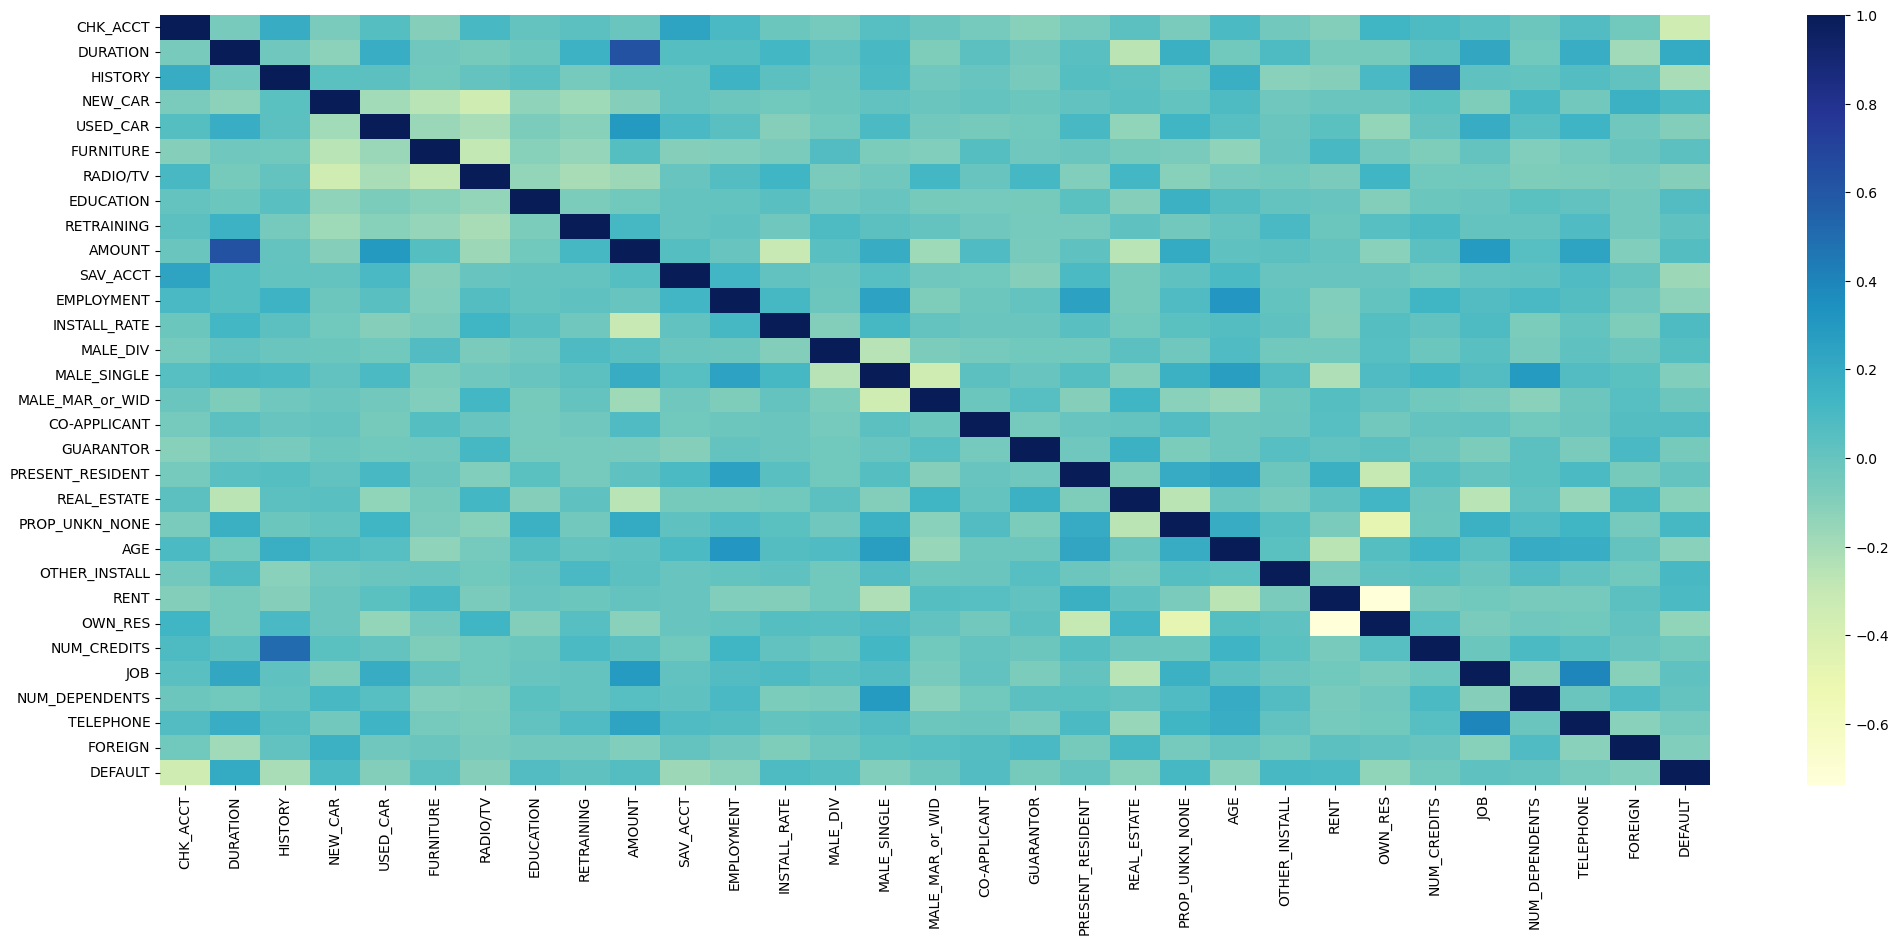

In [39]:
corr= df1.astype('int64').corr(method='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=False, cmap= 'YlGnBu')

Podemos observar multicolienalidad en ciertas variables, en el ejercicio de Variable Clustering lo veremos más a detalle.

In [40]:
analisis_bi_multi.correlation(df1, 'DEFAULT')

,Correlation,P-Value
CHK_ACCT,-0.347911,1.839851e-29
DURATION,0.199036,2.820844e-10
HISTORY,-0.208828,3.460063e-11
NEW_CAR,0.091659,3.951240e-03
USED_CAR,-0.096497,2.406644e-03
FURNITURE,0.029448,3.553878e-01
RADIO/TV,-0.102269,1.293935e-03
EDUCATION,0.074132,1.984701e-02
RETRAINING,0.025618,4.214245e-01
AMOUNT,0.066847,3.574625e-02


In [41]:
analisis_bi_multi.olstest(df1,'DEFAULT')

{'CHK_ACCT': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                     P>F  df constraint  df denom
 const   [[510.6218742984044]]   2.019440844880493e-91              1     985.0
 x      [[136.75634380289983]]  1.1253538797307124e-29              1     985.0,
 'DURATION': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                     P>F  df constraint  df denom
 const  [[20.912914506735415]]  5.4180342526266144e-06              1     985.0
 x       [[41.12942261655126]]   2.207803798501506e-10              1     985.0,
 'HISTORY': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                    P>F  df constraint  df denom
 const  [[208.19556066188628]]  5.875443458709863e-43              1     985.0
 x       [[47.89906405986303]]  8.075927747400237e-12              1     985.0,
 'NEW_CAR': <class 'statsmodels.stats.contrast.WaldTestResults'>
                  

In [42]:
analisis_bi_multi.varclus(df1)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,DURATION,0.813781,0.056241,1.973163e-01
1,0,AMOUNT,0.813781,0.104254,2.078928e-01
2,1,AGE,1.000000,0.069285,0.000000e+00
3,2,RENT,0.868998,0.052297,1.382309e-01
4,2,OWN_RES,0.868998,0.226466,1.693550e-01
5,3,NEW_CAR,0.672578,0.067769,3.512242e-01
6,3,RADIO/TV,0.672578,0.087458,3.588020e-01
7,4,CHK_ACCT,0.674580,0.050709,3.428033e-01
8,4,DEFAULT,0.674580,0.031301,3.359351e-01
9,5,HISTORY,0.717955,0.060866,3.003245e-01


In [43]:
corr= stats.spearmanr(df1[['DEFAULT','DURATION','AMOUNT']])
corr[0][0]

array([1.        , 0.19903589, 0.06684738])

In [44]:
corr= stats.spearmanr(df1[['DEFAULT','RENT','OWN_RES']])
corr[0][0]

array([ 1.        ,  0.09661323, -0.13538445])

In [45]:
corr= stats.spearmanr(df1[['DEFAULT','RADIO/TV','NEW_CAR']])
corr[0][0]

array([ 1.        , -0.10226945,  0.09165896])

In [46]:
corr= stats.spearmanr(df1[['DEFAULT','HISTORY','NUM_CREDITS']])
corr[0][0]

array([ 1.        , -0.20882818, -0.03833017])

In [47]:
corr= stats.spearmanr(df1[['DEFAULT','JOB','TELEPHONE']])
corr[0][0]

array([ 1.        ,  0.02713802, -0.05212166])

In [48]:
analisis_bi_multi.woenum(df1.astype('int'),df1['DEFAULT'])

{'CHK_ACCT':                  Bin  Count  Count (%)  Non-event  Event  Event rate  \
 0       (-inf, 0.50)    271   0.274569        137    134    0.494465   
 1       [0.50, 1.50)    260   0.263425        164     96    0.369231   
 2       [1.50, 2.50)     63   0.063830         49     14    0.222222   
 3        [2.50, inf)    393   0.398176        347     46    0.117048   
 4            Special      0   0.000000          0      0    0.000000   
 5            Missing      0   0.000000          0      0    0.000000   
 Totals                  987   1.000000        697    290    0.293820   
 
              WoE        IV        JS  
 0      -0.854763  0.226950  0.027536  
 1      -0.341386  0.032684  0.004066  
 2       0.375858  0.008278  0.001029  
 3       1.143779  0.388001  0.046018  
 4            0.0  0.000000  0.000000  
 5            0.0  0.000000  0.000000  
 Totals            0.655914  0.078648  ,
 'DURATION':                    Bin  Count  Count (%)  Non-event  Event  Event ra

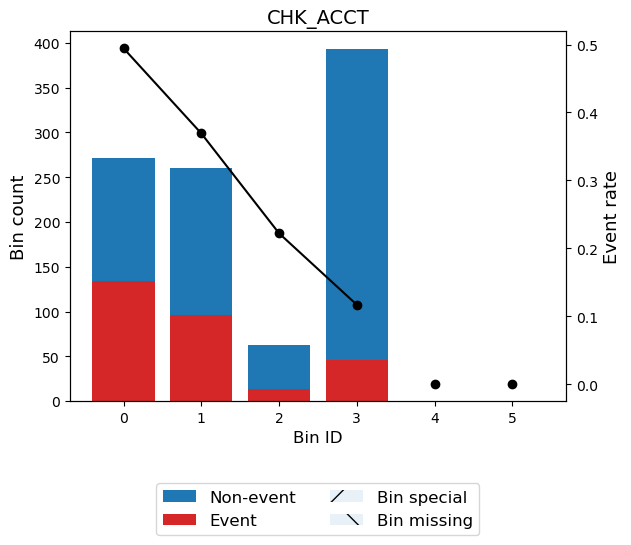

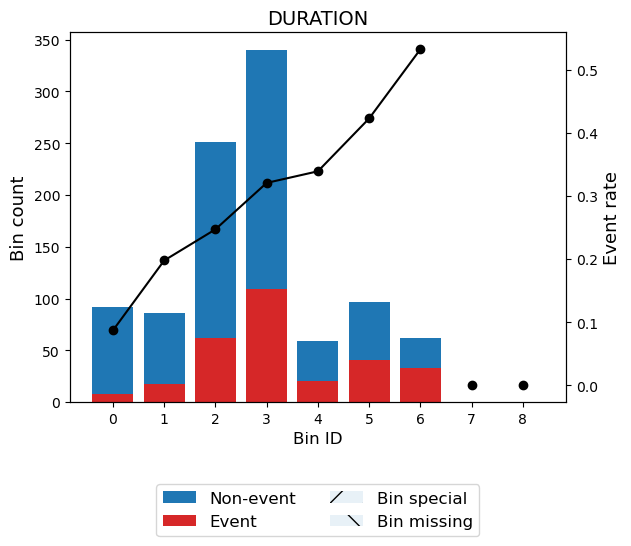

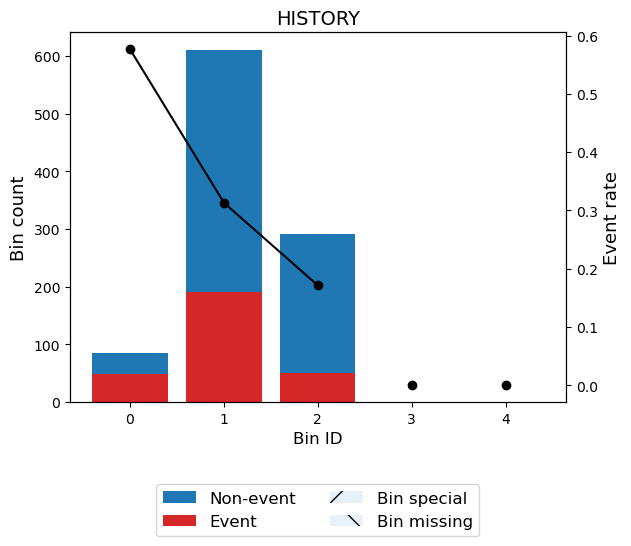

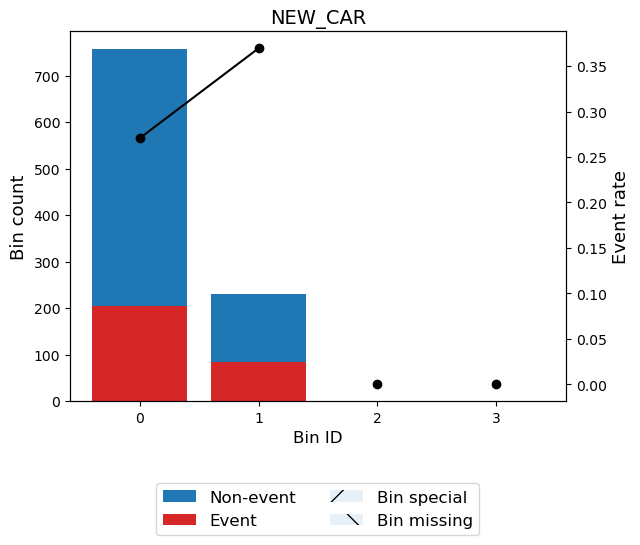

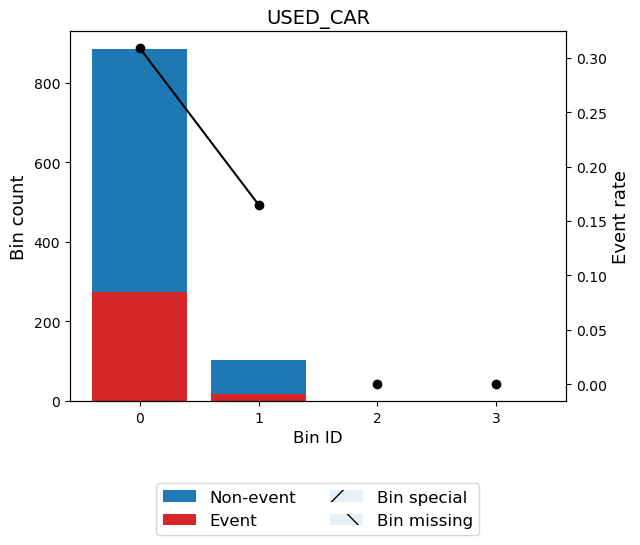

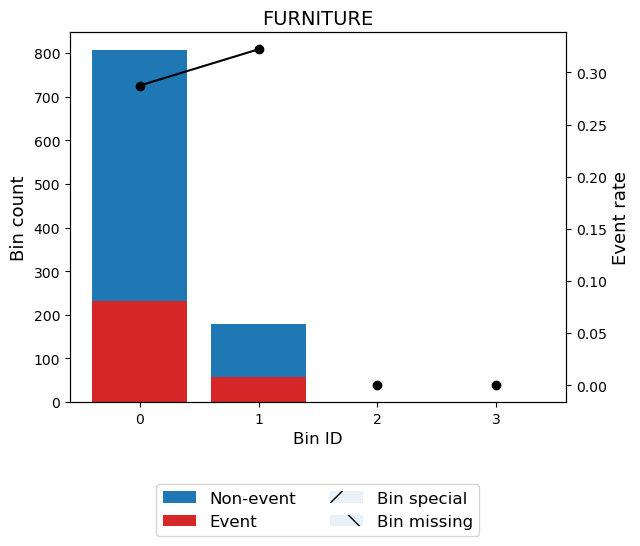

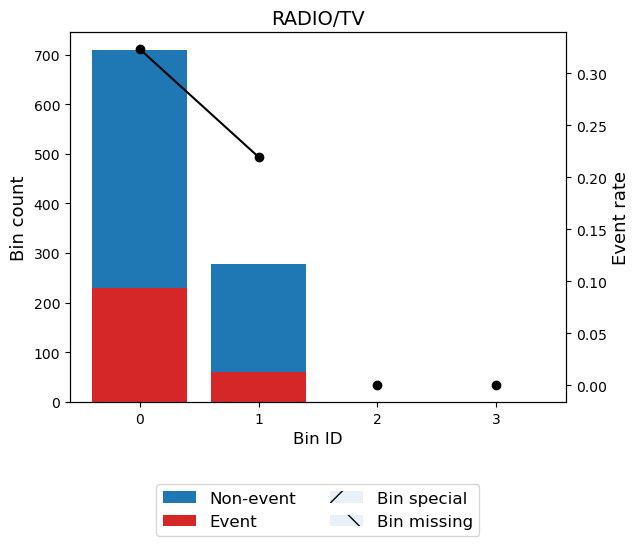

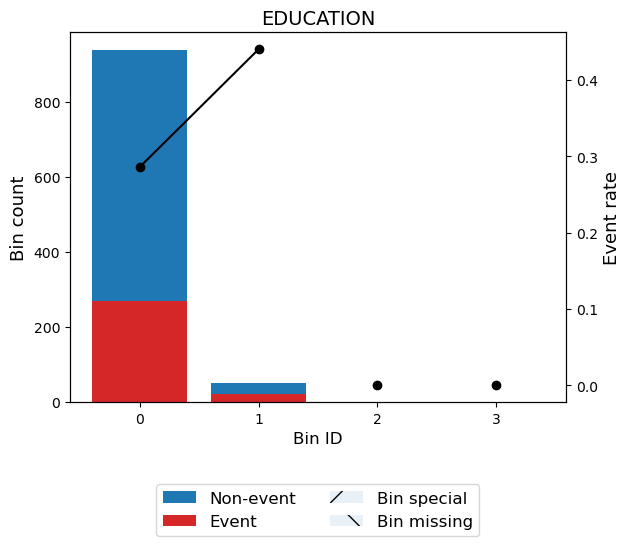

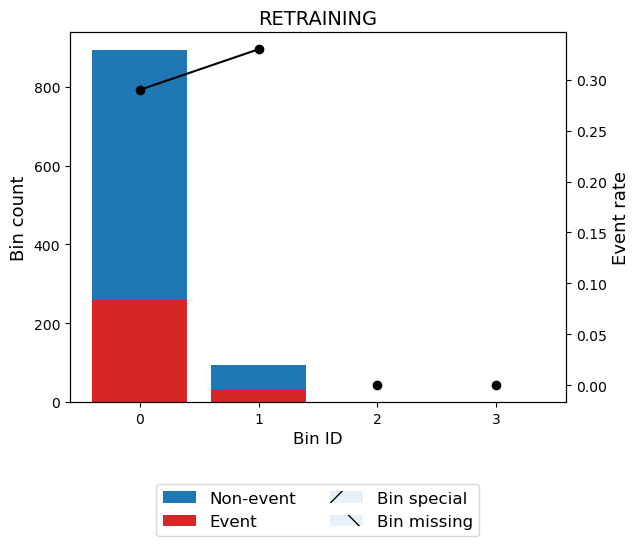

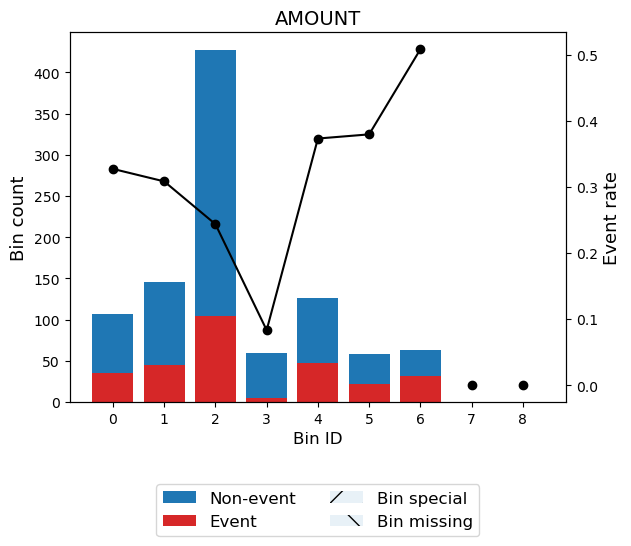

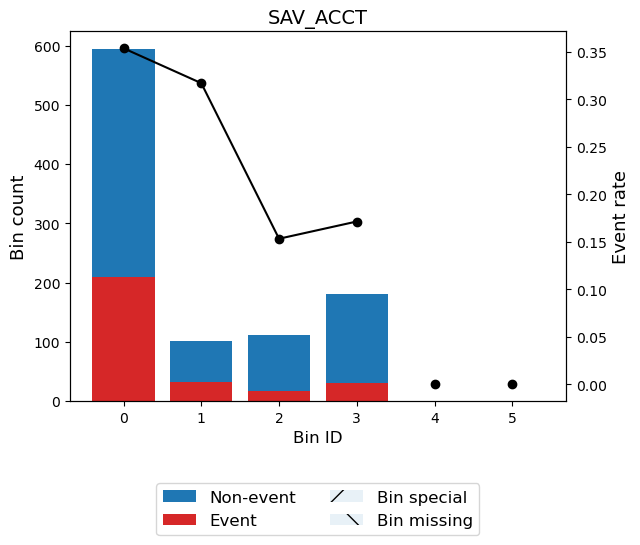

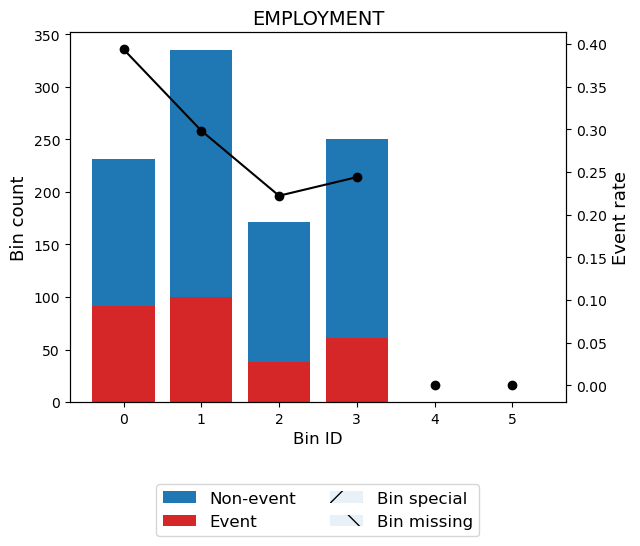

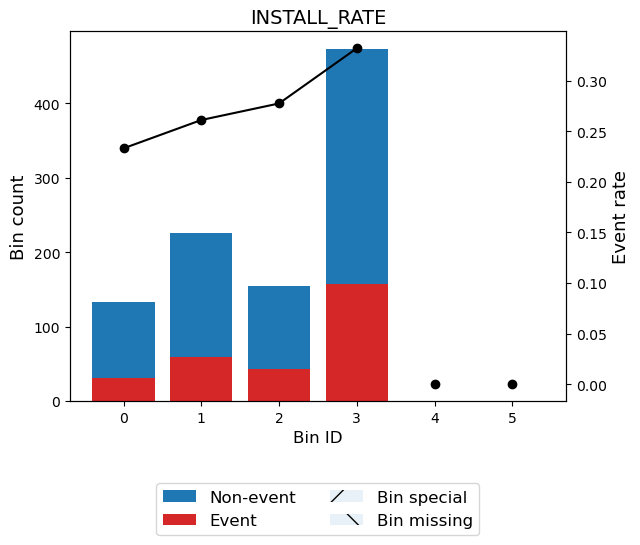

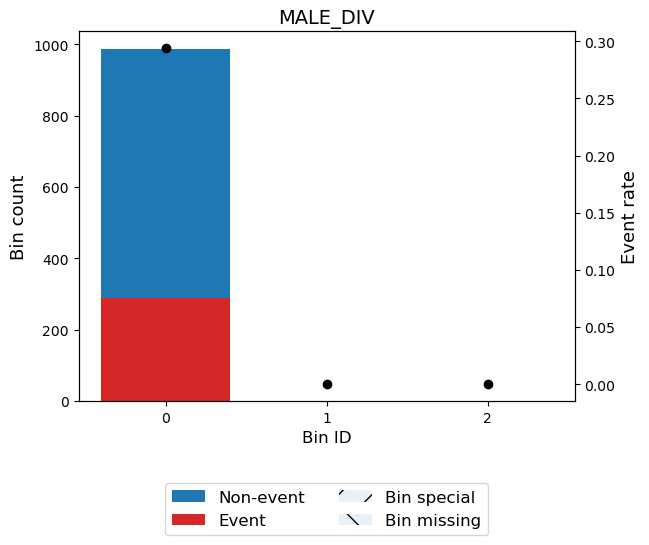

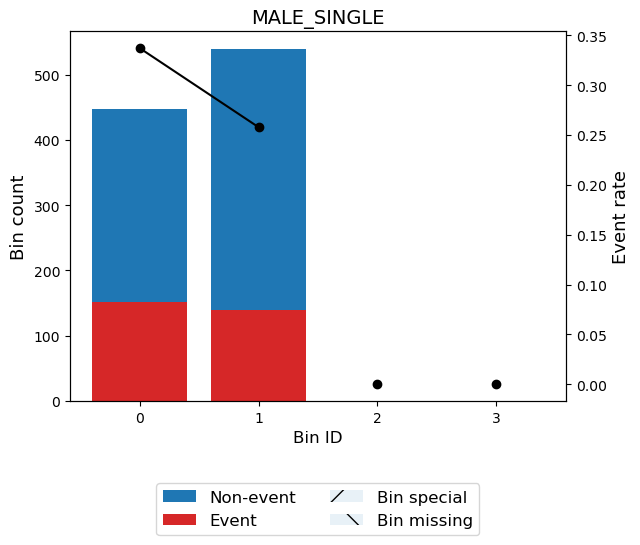

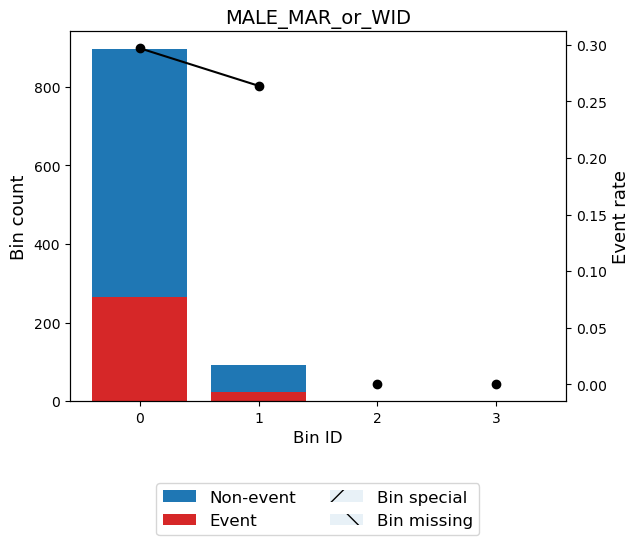

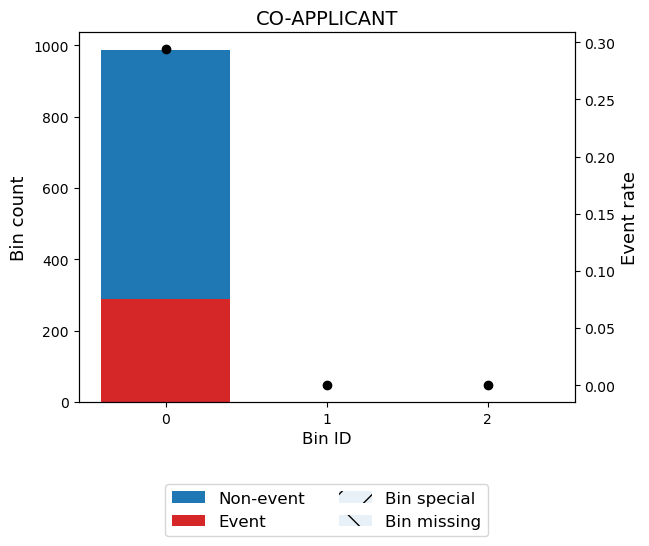

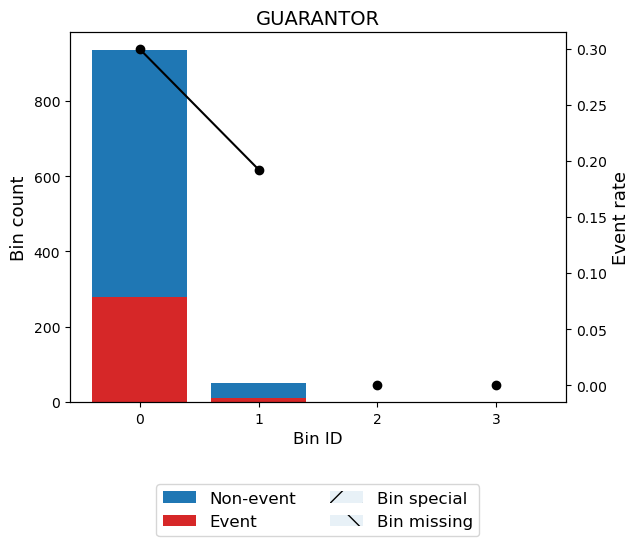

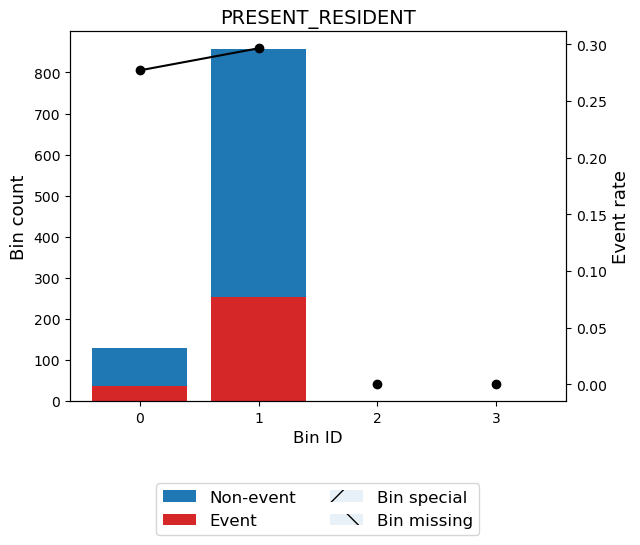

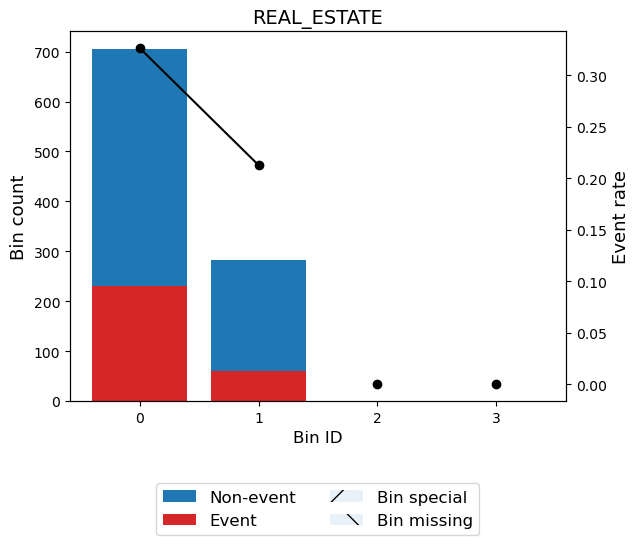

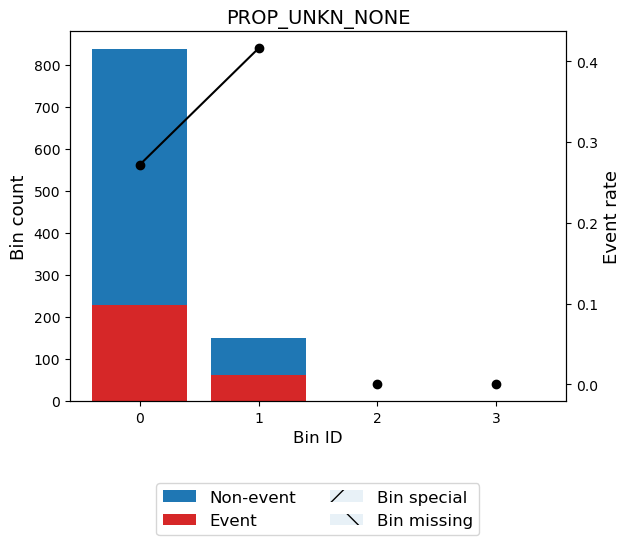

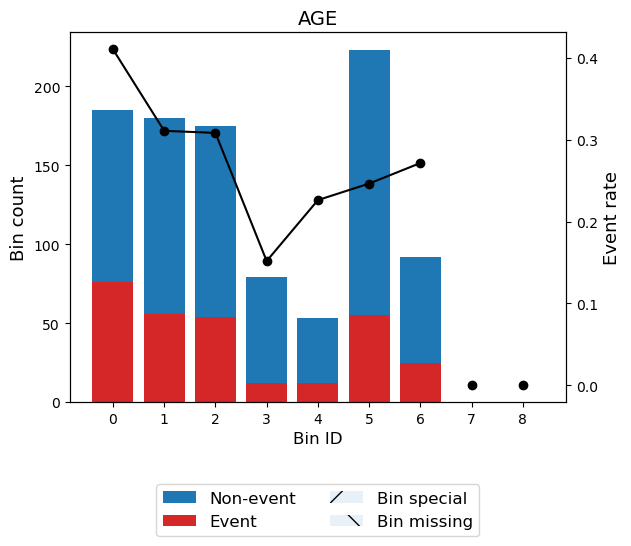

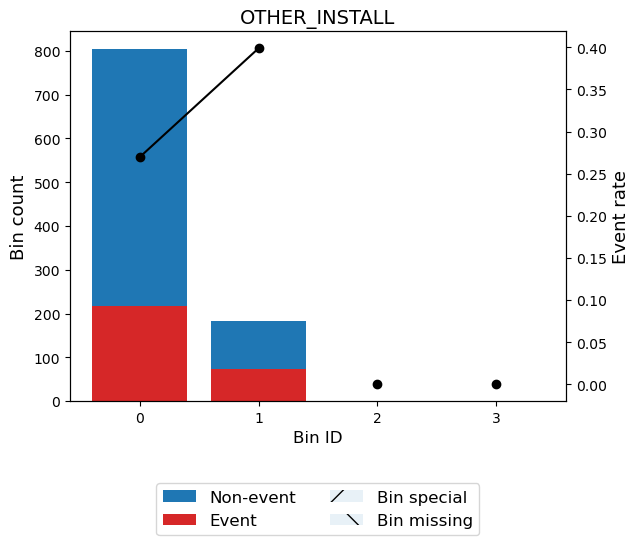

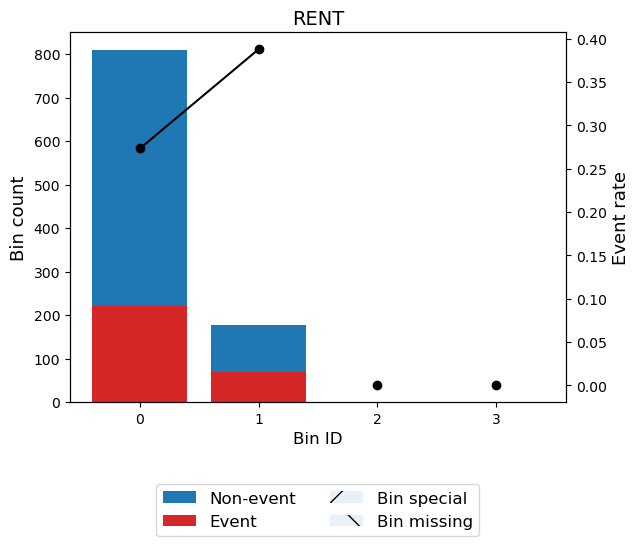

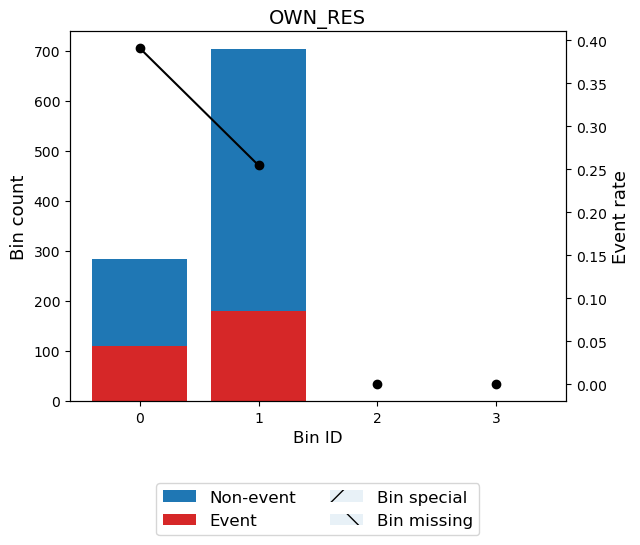

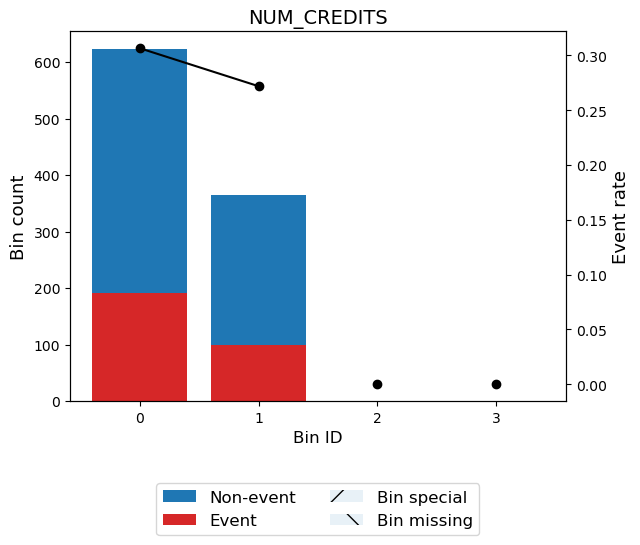

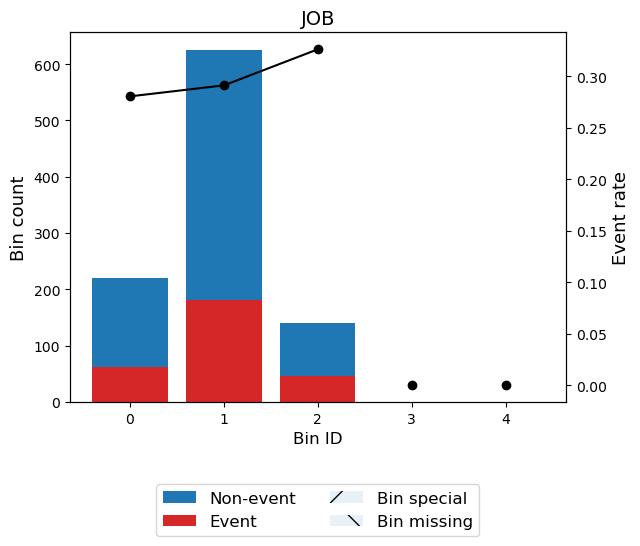

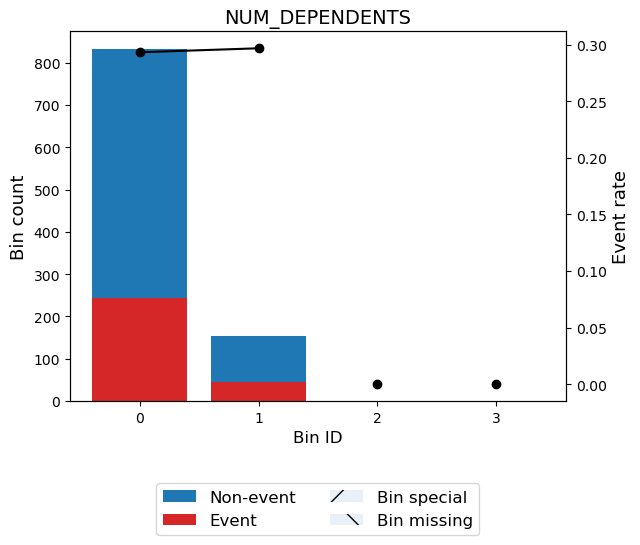

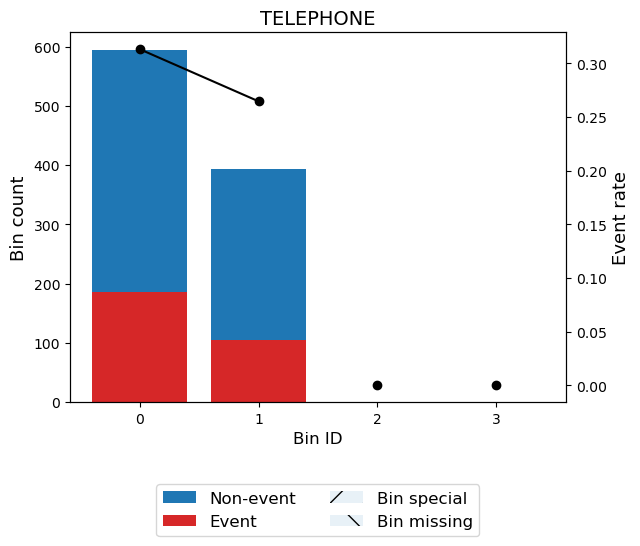

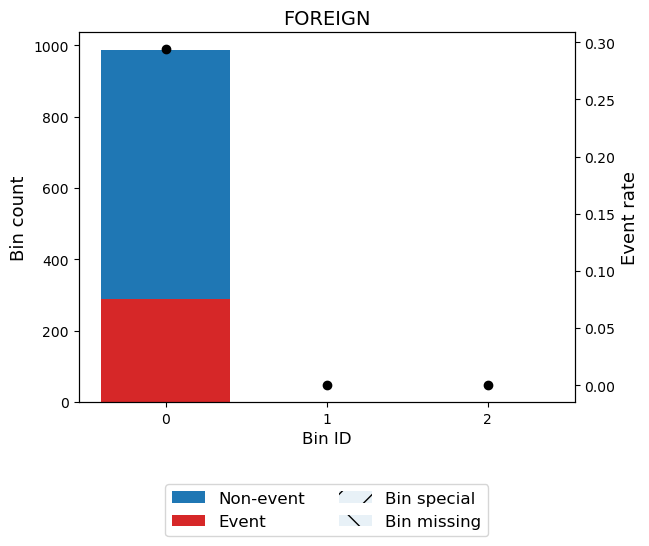

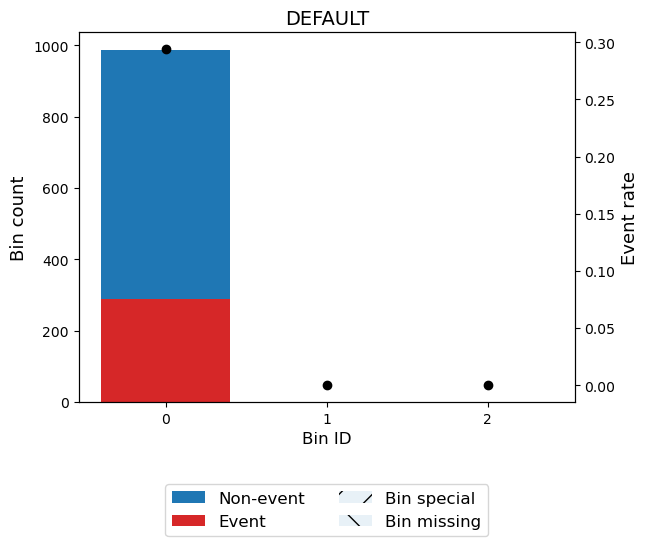

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [49]:
analisis_bi_multi.woegrafnum(df1.astype('int'),df1['DEFAULT'])

In [50]:
analisis_bi_multi.woecat(df1,df1['DEFAULT'])

{'CHK_ACCT':             Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [3]    393   0.398176        347     46    0.117048  1.143779   
 1           [2]     63   0.063830         49     14    0.222222  0.375858   
 2           [1]    260   0.263425        164     96    0.369231 -0.341386   
 3           [0]    271   0.274569        137    134    0.494465 -0.854763   
 4       Special      0   0.000000          0      0    0.000000       0.0   
 5       Missing      0   0.000000          0      0    0.000000       0.0   
 Totals             987   1.000000        697    290    0.293820             
 
               IV        JS  
 0       0.388001  0.046018  
 1       0.008278  0.001029  
 2       0.032684  0.004066  
 3       0.226950  0.027536  
 4       0.000000  0.000000  
 5       0.000000  0.000000  
 Totals  0.655914  0.078648  ,
 'HISTORY':             Bin  Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [4]    292   0.2958

In [125]:
log= LogisticRegression(random_state=0,penalty=None)
sfs= SequentialFeatureSelector(log,k_features=12,forward=True,scoring='roc_auc',floating=True)
sfs.fit(data_x,df1['DEFAULT'])

sfs.k_feature_names_

('0', '1', '2', '3', '4', '7', '10', '11', '14', '17', '22', '29')

In [122]:
log= LogisticRegression(random_state=0,penalty=None)
sfs= SequentialFeatureSelector(log,k_features=12,forward=False,scoring='roc_auc',floating=True)
sfs.fit(data_x,df1['DEFAULT'])

sfs.k_feature_names_

('0', '2', '3', '4', '7', '9', '10', '12', '17', '22', '23', '29')

In [54]:
var_selection.decisiontrees(df1,'DEFAULT')

Feature 0: 0.09649437208734207
Feature 1: 0.08585569218583737
Feature 2: 0.04679728788253078
Feature 3: 0.026698218441855798
Feature 4: 0.017128791430723364
Feature 5: 0.008712717504786041
Feature 6: 0.010918698029962941
Feature 7: 0.010539190336475653
Feature 8: 0.01064694621814
Feature 9: 0.14983063351397072
Feature 10: 0.03884736894398944
Feature 11: 0.0654162176445021
Feature 12: 0.03731414901568084
Feature 13: 0.004142408863508854
Feature 14: 0.02139462618266018
Feature 15: 0.011119327102814122
Feature 16: 0.0077451574607221895
Feature 17: 0.008494327630118046
Feature 18: 0.051003266930663475
Feature 19: 0.027011352262470766
Feature 20: 0.01349117038487851
Feature 21: 0.14108235454445453
Feature 22: 0.021350786345116328
Feature 23: 0.006162393087564769
Feature 24: 0.017064987250157752
Feature 25: 0.02017605545366451
Feature 26: 0.027383021393174122
Feature 27: 0.007992020739578413
Feature 28: 0.009186461132656502
Feature 29: 0.0


In [55]:
var_selection.randomforest(df1,'DEFAULT','log_loss')

Feature 0: 0.10291874742037495
Feature 1: 0.09448009831043451
Feature 2: 0.055132990471797906
Feature 3: 0.01979655377193277
Feature 4: 0.012374047137870946
Feature 5: 0.01665680529313789
Feature 6: 0.01636301516438109
Feature 7: 0.009481213293577727
Feature 8: 0.011945662755416777
Feature 9: 0.12651660294296513
Feature 10: 0.048290675424722034
Feature 11: 0.05263177448167124
Feature 12: 0.044538655090727096
Feature 13: 0.007718226931555528
Feature 14: 0.02120791103957869
Feature 15: 0.010317790949894016
Feature 16: 0.011218950774527513
Feature 17: 0.010608072082404751
Feature 18: 0.04281247650154894
Feature 19: 0.02013418626243312
Feature 20: 0.013868601950164277
Feature 21: 0.10172284912911442
Feature 22: 0.02400805422164544
Feature 23: 0.012328197765531785
Feature 24: 0.017023389109293054
Feature 25: 0.02269071524382526
Feature 26: 0.030866305832142837
Feature 27: 0.015518349106769622
Feature 28: 0.021282368542797216
Feature 29: 0.005546712997763628


In [100]:
var_selection.gradientboost(df1,'DEFAULT')

Feature 0: 0.20067098974548223
Feature 1: 0.11263336600556036
Feature 2: 0.09227910496812014
Feature 3: 0.0346577612889013
Feature 4: 0.016379287570686477
Feature 5: 0.004154251882246445
Feature 6: 0.013092960049976196
Feature 7: 0.0071161712111231555
Feature 8: 0.004247854953206558
Feature 9: 0.12584965364171122
Feature 10: 0.06294480219403961
Feature 11: 0.04037042985871886
Feature 12: 0.036019384100271515
Feature 13: 0.008961550602009977
Feature 14: 0.008800068724953494
Feature 15: 0.0020532529309426058
Feature 16: 0.006249634630088537
Feature 17: 0.01569259472747374
Feature 18: 0.01780642842560895
Feature 19: 0.014559555450071772
Feature 20: 0.008818124198624256
Feature 21: 0.05679212811152449
Feature 22: 0.026524110066039244
Feature 23: 0.009021619538073988
Feature 24: 0.021977179252395333
Feature 25: 0.007307109727301846
Feature 26: 0.014411850799824225
Feature 27: 0.010275192453861222
Feature 28: 0.007845854590255948
Feature 29: 0.012487728300906326


In [90]:
scaler= StandardScaler()
data_x= scaler.fit_transform(df1.drop(columns=['DEFAULT']))

In [130]:
lasso_reg= Lasso(alpha=0.01,positive=False,selection='random',random_state=0)
lasso_reg.fit(X= data_x, y=df1['DEFAULT'])
lasso_reg.coef_

array([-0.11382773,  0.05957945, -0.05675242,  0.03656702, -0.02415458,
        0.        , -0.00380224,  0.02385411,  0.        ,  0.01970134,
       -0.04333664, -0.01815078,  0.03365712,  0.00959317, -0.02074349,
       -0.        ,  0.01090257, -0.02595435,  0.        , -0.01239588,
        0.01458213, -0.00869658,  0.02573561,  0.02121877, -0.        ,
        0.00910922,  0.        ,  0.        , -0.01321751, -0.02113297])

In [120]:
ridge_reg= Ridge(alpha=0.1,positive=False)
ridge_reg.fit(X= data_x, y=df1['DEFAULT'])
ridge_reg.coef_

array([-0.11530541,  0.05825939, -0.06953064,  0.04724338, -0.03299502,
       -0.00108082, -0.00617245,  0.03274108, -0.00076804,  0.03644773,
       -0.05098051, -0.02594907,  0.05201688,  0.01846344, -0.03638492,
       -0.00925   ,  0.01898189, -0.03435257,  0.00517343, -0.01516985,
        0.03028091, -0.01694033,  0.03347125,  0.04444006,  0.02055311,
        0.02650905,  0.00971265,  0.01456578, -0.02996043, -0.0299991 ])

In [105]:
elas_reg= ElasticNet(alpha=0.01,positive=False)
elas_reg.fit(X= data_x, y=df1['DEFAULT'])
elas_reg.coef_

array([-0.11395135,  0.05843863, -0.06255816,  0.04190146, -0.0282771 ,
        0.        , -0.00481272,  0.02813276,  0.        ,  0.0283197 ,
       -0.04681426, -0.02137653,  0.04301893,  0.01425139, -0.02805042,
       -0.00421922,  0.01523624, -0.02983564,  0.        , -0.01435179,
        0.01768113, -0.01296247,  0.02953061,  0.02524301, -0.        ,
        0.01747481,  0.00200679,  0.00628486, -0.02048815, -0.0255106 ])

Teniendo seleccionadas las mejores variables para el modelo, comenzaremos con dividir los datos y posteriormente haremos como base un Logistic Regression y varios modelos.

In [29]:
x_train,x_test,y_train,y_test= train_test_split(df1.drop(columns=['DEFAULT']),df1['DEFAULT'],test_size=0.3,random_state=0,stratify=df1['DEFAULT'])